In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy.interpolate import UnivariateSpline

In [2]:
data = pd.read_excel("216.ods", engine='odf', nrows=7, usecols="A, C, F, H, K, M, P, R")
print(data)

   dP20, atm  T20, K  dP30, atm    T30, K  dP40, atm    T40, K  dP50, atm  \
0        4.0   4.350        4.0  3.707317        4.0  3.166667        4.0   
1        3.5   3.725        3.5  3.195122        3.5  2.690476        3.5   
2        3.0   3.150        3.0  2.682927        3.0  2.166667        3.0   
3        2.5   2.600        2.5  2.146341        2.5  1.738095        2.5   
4        2.0   2.075        2.0  1.707317        2.0  1.309524        2.0   
5        1.5   1.525        1.5  1.317073        1.5  0.928571        1.5   
6        1.0   1.025        1.0  0.829268        1.0  0.595238        1.0   

     T50, K  
0  2.465116  
1  2.023256  
2  1.558140  
3  1.209302  
4  0.953488  
5  0.720930  
6  0.488372  


In [3]:
label_postfix = "$\degree C$"
def lin_plot(x, y, label = None, marker = None):
    coeffs = np.polyfit(x, y, 1)
    equ = lambda x: coeffs[0] * x + coeffs[1]
    
    plt.scatter(x, y, marker=marker, label = label + " " +label_postfix)
    x_space = np.linspace(min(x)/1.1, max(x)*1.1, 100)
    plt.plot(x_space, equ(x_space))

In [4]:
# y = kx + b  k  = <xy>-<x><y>
#             dk = sq(1/(n-2)*(<y^2>-<y>^2)/(<x^2>-<x>^2)) 

def least_sq(x, y, title):
    n = len(x)
    x_mean  = np.mean(x)
    y_mean  = np.mean(y)
    xy_mean = np.mean(np.multiply(x, y))
    xx_mean = np.mean(np.multiply(x, x))
    yy_mean = np.mean(np.multiply(y, y))
    
    k  = (xy_mean - x_mean*y_mean)/(xx_mean - x_mean*x_mean)
    dk = np.sqrt(1/(n-2)*((yy_mean - y_mean*y_mean)/(xx_mean - x_mean*x_mean) - k*k))
    
    b  = y_mean - k*x_mean
    db = dk*np.sqrt(xx_mean - x_mean*x_mean)
    
    print(title)
    print("<x> = {}; <y> = {};".format(x_mean, y_mean))
    print("k = {: 11.6G}; dk = {: 11.6G};".format(k, dk))
    print("b = {: 11.6G}; db = {: 11.6G};\n".format(b, db))
    
    return [k, dk, b, db]

T = 20
<x> = 2.5; <y> = 2.6357142857142852;
k =     1.10357; dk =   0.0155675;
b =   -0.123214; db =   0.0155675;

T = 30
<x> = 2.5; <y> = 2.226480836236932;
k =    0.954704; dk =   0.0203169;
b =   -0.160279; db =   0.0203169;

T = 40
<x> = 2.5; <y> = 1.7993197278911577;
k =    0.863946; dk =   0.0270403;
b =   -0.360544; db =   0.0270403;

T = 50
<x> = 2.5; <y> = 1.3455149501661143;
k =    0.652824; dk =   0.0453035;
b =   -0.286545; db =   0.0453035;

mu(T^-1)
<x> = 0.003251040681847908; <y> = 0.8937611899552789;
k =     1361.06; dk =     169.667;
b =     -3.5311; db =   0.0200482;



[1361.0586526534173,
 169.66714284927608,
 -3.5310958602020825,
 0.020048150848597488]

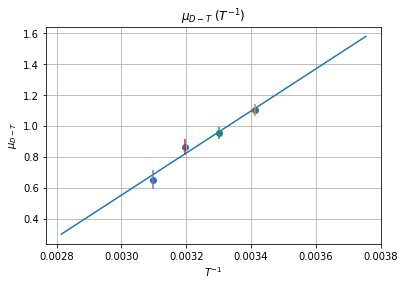

In [5]:
k_arr = [
    least_sq(data['dP20, atm'], data['T20, K'], "T = 20")[0],
    least_sq(data['dP30, atm'], data['T30, K'], "T = 30")[0],
    least_sq(data['dP40, atm'], data['T40, K'], "T = 40")[0],
    least_sq(data['dP50, atm'], data['T50, K'], "T = 50")[0],
]
t_arr = [1/293, 1/303, 1/313, 1/323]

lin_plot(t_arr, k_arr, "aa")
plt.title("$\mu_{D-T} \; (T^{-1})$")
plt.xlabel(r"$T^{-1}$")
plt.ylabel(r"$\mu_{D-T}$")
plt.errorbar(t_arr[0], k_arr[0], xerr=0.005/50*1/293, yerr=0.04)
plt.errorbar(t_arr[1], k_arr[1], xerr=0.005/50*1/303, yerr=0.04)
plt.errorbar(t_arr[2], k_arr[2], xerr=0.005/50*1/313, yerr=0.05)
plt.errorbar(t_arr[3], k_arr[3], xerr=0.005/50*1/323, yerr=0.06)
plt.grid(True)

plt.savefig("pic2.pdf")

least_sq(t_arr, k_arr, "mu(T^-1)")

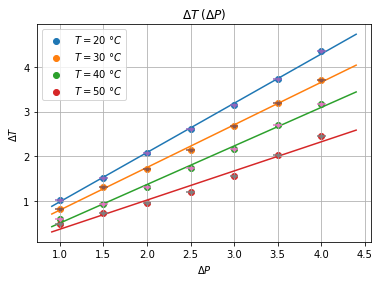

In [6]:
data_P20 = data['dP20, atm'].dropna()
data_T20 = data['T20, K'].dropna()
data_P30 = data['dP30, atm'].dropna()
data_T30 = data['T30, K'].dropna()
data_P40 = data['dP40, atm'].dropna()
data_T40 = data['T40, K'].dropna()
data_P50 = data['dP50, atm'].dropna()
data_T50 = data['T50, K'].dropna()

lin_plot(data_P20, data_T20, '$T=20$')
lin_plot(data_P30, data_T30, '$T=30$')
lin_plot(data_P40, data_T40, '$T=40$')
lin_plot(data_P50, data_T50, '$T=50$')

plt.errorbar(data_P20, data_T20, xerr=0.05, yerr=0.005, fmt='.')
plt.errorbar(data_P30, data_T30, xerr=0.05, yerr=0.005, fmt='.')
plt.errorbar(data_P40, data_T40, xerr=0.05, yerr=0.005, fmt='.')
plt.errorbar(data_P50, data_T50, xerr=0.05, yerr=0.005, fmt='.')

plt.title("$\Delta T \; (\Delta P)$")
plt.ylabel(r"$\Delta T$")
plt.xlabel(r"$\Delta P$")
plt.grid(True)

plt.legend()
plt.savefig("pic1.pdf")